In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from datetime import datetime
from scipy import stats
import math
import seaborn as sns
%matplotlib inline
sns.set(style='white', color_codes = True)

In [4]:
initial = pd.read_csv('C:/users/rustym/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [5]:
ps = initial[['Date', 'Slice (Lims ID?)', 'Post patch?', 'Post patch pipette R' , 'PCR cycles', 'SM_QC_PF', 'Bad dates']]
ps = ps[ps['PCR cycles'] == 21]
ps['Date'] = pd.to_datetime(ps['Date'], format = '%y%m%d')
ps = ps[ps['Bad dates'] != 'x']
ps = ps.drop('Bad dates', 1)
ps = ps[ps['SM_QC_PF'] != 'cnt']
ps.dropna(subset = ['Post patch?', 'SM_QC_PF'], inplace = True)
ps['Post patch?'] = ps['Post patch?'].astype('category')

In [6]:
ps.head()

,Date,Slice (Lims ID?),Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF
4968,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02,Outside-Out,NaN,21.0,fail
4969,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02,Outside-Out,NaN,21.0,pass
4970,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,No-Seal,NaN,21.0,fail
4971,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Nucleated,NaN,21.0,pass
4972,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Outside-Out,NaN,21.0,pass


In [7]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [8]:
nuc = nucleated(ps)
nuc["post patch class"] = "Nucleated"
part_nuc = partial_nucleated(ps)
part_nuc["post patch class"] = "Partial nucleated"
out_out = outside_out(ps)
out_out["post patch class"] = "Outside out"
noSeal = no_seal(ps)
noSeal["post patch class"] = "No seal"
entirecell = entire_cell(ps)
entirecell['post patch class'] = "Entire cell"

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [9]:
frames = [nuc, part_nuc, out_out, noSeal, entirecell]
ps = pd.concat(frames)
ps.head()

,Date,Slice (Lims ID?),Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,post patch class
4971,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Nucleated,NaN,21.0,pass,Nucleated
4973,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02,Nucleated,NaN,21.0,pass,Nucleated
4975,2017-04-19,Sst-IRES-Cre;Ai14-313562.02.02,Nucleated,NaN,21.0,pass,Nucleated
4988,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01,Nucleated,NaN,21.0,pass,Nucleated
4997,2017-04-20,Vip-IRES-Cre;Ai14-313534.05.01,Nucleated,NaN,21.0,pass,Nucleated


In [10]:
ps['Cre_line'] = ps['Slice (Lims ID?)'].str[:-18]
ps = ps.drop('Slice (Lims ID?)', 1)
ps.head()

,Date,Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,post patch class,Cre_line
4971,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4973,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4975,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4988,2017-04-20,Nucleated,NaN,21.0,pass,Nucleated,Vip-IRES-Cre
4997,2017-04-20,Nucleated,NaN,21.0,pass,Nucleated,Vip-IRES-Cre


In [11]:
ps0 = ps.drop('Post patch?', 1)
ps0 = ps.drop('PCR cycles', 1)
ps0 = ps.drop('SM_QC_PF', 1)

In [12]:
ps0.to_csv('cre_nuc.csv')

In [13]:
ps['Cre_line'].value_counts()
#ps['Cre line'].sort_values()

Gad2-IRES-Cre                       255
Slc32a1-IRES-Cre                    253
Vip-IRES-Cre                        225
Rbp4-Cre_KL100                      130
Rorb-IRES2-Cre                      128
Pvalb-IRES-Cre                      118
Sst-IRES-Cre                        100
Oxtr-T2A-Cre                         71
Chrna2-Cre_OE25                      67
Scnn1a-Tg3-Cre                       62
Cux2-CreERT2                         60
Nr5a1-Cre                            60
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO     59
Rorb-IRES2-Cre-neo                   51
Scnn1a-Tg2-Cre                       32
Ctgf-T2A-dgCre                       30
Chat-IRES-Cre-neo                    27
Htr3a-Cre_NO152                      19
Ndnf-IRES2-dgCre                     19
Htr3a-Cre_NO152;Pvalb-T2A-Dre        16
Slc17a8-IRES2-Cre                    15
Pdyn-T2A-CreERT2                     13
Glt25d2-Cre_NF107                    12
Nos1-CreERT2;Sst-IRES-FlpO           10
Nkx2-1-CreERT2                        9


In [14]:
ps.groupby(['Cre_line'])['post patch class'].value_counts()
ps.head()

,Date,Post patch?,Post patch pipette R,PCR cycles,SM_QC_PF,post patch class,Cre_line
4971,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4973,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4975,2017-04-19,Nucleated,NaN,21.0,pass,Nucleated,Sst-IRES-Cre
4988,2017-04-20,Nucleated,NaN,21.0,pass,Nucleated,Vip-IRES-Cre
4997,2017-04-20,Nucleated,NaN,21.0,pass,Nucleated,Vip-IRES-Cre


In [15]:
ps = ps.drop('Date', 1)
ps = ps.drop('PCR cycles', 1)
ps = ps.drop('Post patch pipette R',1)
ps = ps.drop('Post patch?',1)
ps['post_patch'] = ps['SM_QC_PF']
ps = ps.drop('SM_QC_PF', 1)
#ps['total'] = ps['post_patch']
#ps.tail()

In [16]:
ps1 = ps.groupby(['Cre_line', 'post patch class']).count()
ps1

post_patch
Cre_line                         post patch class             
Chat-IRES-Cre-neo                Entire cell                 3
                                 No seal                    10
                                 Nucleated                   5
                                 Partial nucleated           9
Chrna2-Cre_OE25                  Entire cell                 2
                                 No seal                    22
                                 Nucleated                  37
                                 Outside out                 3
                                 Partial nucleated           3
Ctgf-T2A-dgCre                   No seal                    15
                                 Nucleated                  13
                                 Partial nucleated           2
Cux2-CreERT2                     No seal                    21
                                 Nucleated                  31
                                 Outside out                 2
                                 Partial nucleated           6
Gad2-IRES-Cre                    Entire cell                 1
                                 No seal                    98
                                 Nucleated                 113
                                 Outside out                13
                                 Partial nucleated          30
Glt25d2-Cre_NF107                No seal                     3
                                 Nucleated                   8
                                 Partial nucleated           1
Htr3a-Cre_NO152                  No seal                     4
                                 Nucleated                  14
                                 Partial nucleated           1
Htr3a-Cre_NO152;Pvalb-T2A-Dre    No seal                     5
                                 Nucleated                   9
                                 Outside out                 2
...                                                        ...
Sim1-Cre_KJ18                    Nucleated                   4
                                 Partial nucleated           1
Slc17a8-IRES2-Cre                No seal                     3
                                 Nucleated                   9
                                 Outside out                 1
                                 Partial nucleated           2
Slc32a1-IRES-Cre                 Entire cell                 2
                                 No seal                    78
                                 Nucleated                 135
                                 Outside out                 5
                                 Partial nucleated          33
Sst-IRES-Cre                     No seal                    35
                                 Nucleated                  43
                                 Outside out                11
                                 Partial nucleated          11
Vip-IRES-Cre                     Entire cell                 4
                                 No seal                    83
                                 Nucleated                 104
                                 Outside out                14
                                 Partial nucleated          20
Vipr2-IRES2-Cre-neo              No seal                     1
                                 Nucleated                   2
Vipr2-IRES2-Cre;Pvalb-T2A-FlpO   No seal                     4
                                 Outside out                 1
                                 Partial nucleated           1
Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO Entire cell                 2
                                 No seal                    23
                                 Nucleated                  16
                                 Outside out                 1
                                 Partial nucleated          17

[108 rows x 1 columns]

In [17]:
type(ps1)

pandas.core.frame.DataFrame

In [18]:
ps1 = ps1.add_suffix('_count').reset_index()
ps1

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,3
1,Chat-IRES-Cre-neo,No seal,10
2,Chat-IRES-Cre-neo,Nucleated,5
3,Chat-IRES-Cre-neo,Partial nucleated,9
4,Chrna2-Cre_OE25,Entire cell,2
5,Chrna2-Cre_OE25,No seal,22
6,Chrna2-Cre_OE25,Nucleated,37
7,Chrna2-Cre_OE25,Outside out,3
8,Chrna2-Cre_OE25,Partial nucleated,3
9,Ctgf-T2A-dgCre,No seal,15


In [19]:
ps1['post_patch_count'] = ps1['post_patch_count'].fillna(0)
#ps1['total_count'] = ps1['total_count'].fillna(0)
ps1
#ps1.groupby(['Cre line', 'Post patch?']).agg({'total_count': 'sum'})

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,3
1,Chat-IRES-Cre-neo,No seal,10
2,Chat-IRES-Cre-neo,Nucleated,5
3,Chat-IRES-Cre-neo,Partial nucleated,9
4,Chrna2-Cre_OE25,Entire cell,2
5,Chrna2-Cre_OE25,No seal,22
6,Chrna2-Cre_OE25,Nucleated,37
7,Chrna2-Cre_OE25,Outside out,3
8,Chrna2-Cre_OE25,Partial nucleated,3
9,Ctgf-T2A-dgCre,No seal,15


In [20]:
type(ps1)

pandas.core.frame.DataFrame

In [21]:
ps_totals = ps1.groupby(['Cre_line', 'post patch class']).agg({'post_patch_count': 'sum'})
ps2 = ps1.groupby(['Cre_line']).agg({'post_patch_count': 'sum'})
ps_final = ps_totals.div(ps2, level = 'Cre_line') * 100

In [22]:
ps_final = ps_final.reset_index()

In [23]:
ps_final

,Cre_line,post patch class,post_patch_count
0,Chat-IRES-Cre-neo,Entire cell,11.111111
1,Chat-IRES-Cre-neo,No seal,37.037037
2,Chat-IRES-Cre-neo,Nucleated,18.518519
3,Chat-IRES-Cre-neo,Partial nucleated,33.333333
4,Chrna2-Cre_OE25,Entire cell,2.985075
5,Chrna2-Cre_OE25,No seal,32.835821
6,Chrna2-Cre_OE25,Nucleated,55.223881
7,Chrna2-Cre_OE25,Outside out,4.477612
8,Chrna2-Cre_OE25,Partial nucleated,4.477612
9,Ctgf-T2A-dgCre,No seal,50.000000


In [24]:
ps_nuc = ps_final[ps_final['post patch class'] == 'Nucleated']
ps_nuc['pct_nuc'] = ps_nuc['post_patch_count']
ps_nuc = ps_nuc.drop('post_patch_count', 1)
ps_nuc = ps_nuc.drop('post patch class', 1)
ps_nuc = ps_nuc.reset_index()
#ps_nuc.set_index('Cre_line', inplace=True)
ps_nuc = ps_nuc.drop('index', 1)
ps_nuc

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Cre_line,pct_nuc
0,Chat-IRES-Cre-neo,18.518519
1,Chrna2-Cre_OE25,55.223881
2,Ctgf-T2A-dgCre,43.333333
3,Cux2-CreERT2,51.666667
4,Gad2-IRES-Cre,44.313725
5,Glt25d2-Cre_NF107,66.666667
6,Htr3a-Cre_NO152,73.684211
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,56.250000
8,Ndnf-IRES2-dgCre,42.105263
9,Nkx2-1-CreERT2,44.444444


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


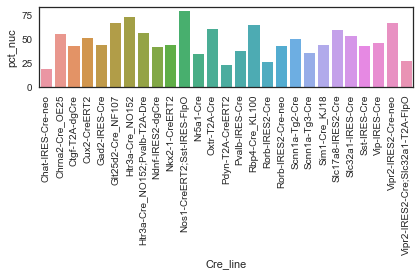

In [25]:
cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', data = ps_nuc)
for item in cre_nuc.get_xticklabels():
    item.set_rotation(90)
#plt.setp(cre_nuc.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.savefig('cre_line_vs_pct_nuc',dpi=100)

In [26]:
#ps2 = ps2.reset_index()
ps2
#ps2.to_csv('cre_line_totals.csv')

,post_patch_count
Cre_line,
Chat-IRES-Cre-neo,27
Chrna2-Cre_OE25,67
Ctgf-T2A-dgCre,30
Cux2-CreERT2,60
Gad2-IRES-Cre,255
Glt25d2-Cre_NF107,12
Htr3a-Cre_NO152,19
Htr3a-Cre_NO152;Pvalb-T2A-Dre,16
Ndnf-IRES2-dgCre,19


In [27]:
#ps2 = ps2.set_index('Cre_line', inplace=True)
ps2 = ps2.reset_index()
#ps2.to_csv('cre_line_totals.csv')

In [28]:
ps2

,Cre_line,post_patch_count
0,Chat-IRES-Cre-neo,27
1,Chrna2-Cre_OE25,67
2,Ctgf-T2A-dgCre,30
3,Cux2-CreERT2,60
4,Gad2-IRES-Cre,255
5,Glt25d2-Cre_NF107,12
6,Htr3a-Cre_NO152,19
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,16
8,Ndnf-IRES2-dgCre,19
9,Nkx2-1-CreERT2,9


In [29]:
ps2 = ps2.drop('Cre_line', 1)

In [30]:
ps2

,post_patch_count
0,27
1,67
2,30
3,60
4,255
5,12
6,19
7,16
8,19
9,9


In [31]:
result = pd.concat([ps_nuc, ps2], axis=1, join='inner')
result

,Cre_line,pct_nuc,post_patch_count
0,Chat-IRES-Cre-neo,18.518519,27
1,Chrna2-Cre_OE25,55.223881,67
2,Ctgf-T2A-dgCre,43.333333,30
3,Cux2-CreERT2,51.666667,60
4,Gad2-IRES-Cre,44.313725,255
5,Glt25d2-Cre_NF107,66.666667,12
6,Htr3a-Cre_NO152,73.684211,19
7,Htr3a-Cre_NO152;Pvalb-T2A-Dre,56.250000,16
8,Ndnf-IRES2-dgCre,42.105263,19
9,Nkx2-1-CreERT2,44.444444,9


In [32]:
types = {'Chat-IRES-Cre-neo': 'inhibitory', 
       'Chrna2-Cre_OE25': 'inhibitory', 
       'Ctgf-T2A-dgCre': 'excitatory', 
       'Cux2-CreERT2': 'excitatory',
       'Gad2-IRES-Cre': 'inhibitory',
       'Glt25d2-Cre_NF107': 'excitatory',
       'Htr3a-Cre_NO152': 'inhibitory',
       'Htr3a-Cre_NO152;Pvalb-T2A-Dre': 'inhibitory',
       'Ndnf-IRES2-dgCre': 'inhibitory',
       'Nkx2-1-CreERT2': 'inhibitory',
       'Nos1-CreERT2;Sst-IRES-FlpO': 'inhibitory',
       'Nr5a1-Cre': 'excitatory',
       'Oxtr-T2A-Cre': 'mix',
       'Pdyn-T2A-CreERT2': 'unknown',
       'Pvalb-IRES-Cre': 'inhibitory',
       'Rbp4-Cre_KL100': 'excitatory',
       'Rorb-IRES2-Cre': 'excitatory',
       'Rorb-IRES2-Cre-neo': 'excitatory',
       'Scnn1a-Tg2-Cre': 'excitatory',
       'Scnn1a-Tg3-Cre': 'excitatory',
       'Sim1-Cre_KJ18': 'excitatory',
       'Slc17a8-IRES2-Cre': 'excitatory',
       'Slc32a1-IRES-Cre': 'inhibitory',
       'Sst-IRES-Cre': 'inhibitory',
       'Vip-IRES-Cre': 'inhibitory',
       'Vipr2-IRES2-Cre-neo': 'inhibitory',
       'Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO': 'inhibitory'}

result['type'] = result['Cre_line'].map(types)

In [33]:
result.set_index('Cre_line')
result.sort_values('type')

,Cre_line,pct_nuc,post_patch_count,type
2,Ctgf-T2A-dgCre,43.333333,30,excitatory
3,Cux2-CreERT2,51.666667,60,excitatory
5,Glt25d2-Cre_NF107,66.666667,12,excitatory
21,Slc17a8-IRES2-Cre,60.000000,15,excitatory
20,Sim1-Cre_KJ18,44.444444,9,excitatory
19,Scnn1a-Tg3-Cre,35.483871,62,excitatory
18,Scnn1a-Tg2-Cre,50.000000,32,excitatory
11,Nr5a1-Cre,35.000000,60,excitatory
17,Rorb-IRES2-Cre-neo,43.137255,51,excitatory
16,Rorb-IRES2-Cre,26.562500,128,excitatory


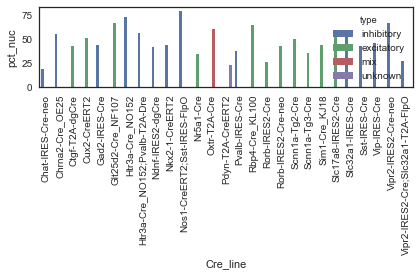

In [34]:
cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', hue = 'type', data = result)
for item in cre_nuc.get_xticklabels():
    item.set_rotation(90)

(0, 100)

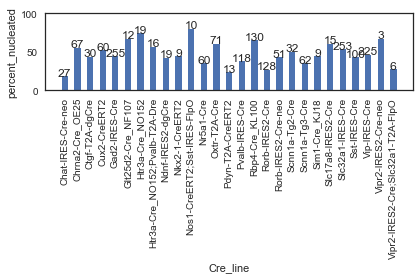

In [35]:
#cre_nuc = sns.barplot(x = 'Cre_line', y = 'pct_nuc', data = result)
#for item in cre_nuc.get_xticklabels():
    #item.set_rotation(90)
nuc_pct = list(result['pct_nuc'])
counts = list(result['post_patch_count'])
names = list(result['Cre_line'])
n_groups = len(names)
#n_groups = 27
index = np.arange(n_groups)
bar_width = 0.5
plt.xlabel('Cre_line')
plt.ylabel('percent_nucleated')
plt.xticks(index, names, rotation=90)
rects = plt.bar(index, nuc_pct, bar_width)
for i, rect in enumerate(rects):
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 1.01*height, counts[i], ha='center')
plt.tight_layout
axes = plt.gca()
axes.set_ylim(0,100)